In [1]:
from pprint import pprint
import os, json, sys

# import reframe test script:
sys.path.append('../reframe') # so that next line can find reframe itself ...
import reframe_omb

In [2]:
# find output files for this test:

def find_run_outputs(root='.', test=None, ext='.out'):
    """ Find files with a given extension within any output directory.
    
        Returns a sequence of paths.
    """
    
    # directory is soemthing like:
    # ../output/sausage-newslurm/compute/gnu8-openmpi3/IMB_MPI1Test/
    
    # TODO: use reframe/reframe/frontend/cli.py code to get the current system, something like
    # import reframe
    # import reframe.core.config as config
    # import reframe.core.runtime as runtime
    # import os

    # # assume default location!
    # print(reframe.INSTALL_PREFIX)
    # config_file = os.path.join(reframe.INSTALL_PREFIX, 'reframe/settings.py')
    # settings = config.load_settings_from_file(config_file)
    # runtime.init_runtime(settings.site_configuration, options.system,
    #                              non_default_craype=options.non_default_craype)
    
    results = []
    for (dirpath, dirnames, filenames) in os.walk(root):
        # in-place filter dirnames to avoid hidden directories:
        for idx, d in enumerate(dirnames):
            if d.startswith('.'):
                del dirnames[idx]
        for f in filenames:
            if os.path.splitext(f)[-1] == ext:
                path = os.path.join(dirpath, f)
                testdir = os.path.basename(os.path.dirname(path))
                if test is None or test in testdir:
                    results.append(path)
    return(results)
                
run_outputs = find_run_outputs('../output', 'OMB')
print(run_outputs)

['../output/sausage-newslurm/compute/gnu8-openmpi3/OMB_BWTest/rfm_OMB_BWTest_job.out']


In [3]:
# load results using the same function that we use for reframe performance tests:

results = []
for path in run_outputs:
    print('read', path)
    result = reframe_omb.read_omb_bw_out(path)
    results.append(result)

read ../output/sausage-newslurm/compute/gnu8-openmpi3/OMB_BWTest/rfm_OMB_BWTest_job.out


In [4]:
# add metadata to results:

def parse_path(path):
    """ Return reframe info from a results path """
    parts = path.split(os.path.sep)
    #sysname, partition, environ, testname, filename = parts[-5:]
    COMPONENTS = ('sysname', 'partition', 'environ', 'testname', 'filename')
    info = dict(zip(COMPONENTS, parts[-5:]))
    return info    
    
for run in results:
    run['meta'] = parse_path(run['file'])

pprint(results)

[{'data': {'bandwidth': [0.05,
                         0.15,
                         0.21,
                         0.34,
                         1.18,
                         2.46,
                         3.18,
                         9.23,
                         17.8,
                         30.58,
                         54.85,
                         118.54,
                         246.66,
                         385.03,
                         503.25,
                         580.76,
                         649.38,
                         815.36,
                         858.51,
                         947.21,
                         885.61,
                         920.81,
                         931.85],
           'size': [1,
                    2,
                    4,
                    8,
                    16,
                    32,
                    64,
                    128,
                    256,
                    512,
                    1

Text(0, 0.5, 'MB/s')

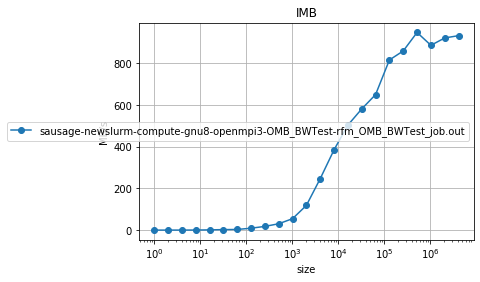

In [16]:
# Plotting

%matplotlib inline
import matplotlib.pyplot as plt

for run in results:
    data = run['data']
    label = '-'.join(list(run['meta'].values()))
    plt.plot(data['size'], data['bandwidth'], 'o-', label=label)
plt.grid()
plt.title('IMB')
plt.legend()
plt.xscale('log')
plt.xlabel('size')
plt.ylabel('MB/s')